Change root directory

In [15]:
import os
os.chdir('/home/bespi123/git/helmholtzCoilsDesigner')
print(os.getcwd())

/home/bespi123/git/helmholtzCoilsDesigner


Import libraries

In [16]:
import time
import numpy as np
import pandas as pd
from src import helmCoils_simulator as sim
from src import plotMagneticField as hplot
from src import helmCoils_optmizer as opt


Initial square spire Simulation in X-Axis

In [17]:
number_of_spires = 2
size_length =  0.72
distance_among_spires = 0.46
turns = 30
current = 1 
rotation_matrix = np.eye(3)
X_coil = sim.CoilParameters(number_of_spires, size_length, distance_among_spires, turns, current, rotation_matrix)
print(X_coil.pos)

# Simulation settings
parallel_coils = 150
batch_Size = 120
#grid_length_size = 0.01 #Space among evaluation points
grid_length_size = 0.01
num_seg = 100           #Numer of segments 

[-0.23  0.23]


In [ ]:
##Spawn spires
spires_x_sq = X_coil.squsre_spires(num_seg)

In [19]:
f0 = None
f0 = hplot.plot_spires(f0, spires_x_sq, color='black', row=None, col=None)

# Plot the square spires
f0.show()

In [ ]:
# Generar grid
X, Y, Z = sim.generate_range([-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2],step_size_x = grid_length_size)
print(X.shape)
print(Y.shape)
print(Z.shape)


(5419,)


In [39]:

hplot.plot_grid(X, Y, Z, f0)

Optimization Problem

In [21]:
# Make sure that Ax, X, Y, Z, and test_3 functions are properly defined in your environment.
optimizer = opt.HelmholtzOptimizer(
    desired_size = 0.30,          # 30e-2 is 0.30 m
    coil = X_coil,
    fun = X_coil.square_spires,
    #fun = X_coil.circular_spires,
    fix_L=True,
    fixed_L_value=1.0,          # Set a fixed value for L if needed
    grid_length_size=grid_length_size,
    population = 20,
    generations = 500,
    mutation = 0.8
)
optimizer.optimize()

gen	nevals	min         	avg   
0  	19    	-1.38778e-16	0.1155
1  	20    	0.01        	750.092
2  	18    	0.06        	750.09 
3  	16    	0.01        	250.09 
4  	18    	0.01        	750.06 
5  	16    	0.01        	250.062
6  	20    	0.01        	500.046
7  	16    	0.01        	0.033  
8  	14    	0.01        	250.031
9  	15    	0.01        	750.014
10 	19    	0.01        	0.0555 
11 	16    	0.01        	500.035
12 	19    	0.01        	500.044
13 	15    	0.01        	500.033
14 	17    	0.01        	250.047
15 	19    	0.01        	500.042
16 	19    	0.01        	0.0325 
17 	19    	0.01        	250.046
18 	18    	0.01        	250.03 
19 	19    	0.01        	500.032
20 	17    	0.01        	500.041
21 	20    	0.01        	250.038
22 	16    	0.01        	0.039  
23 	20    	0.01        	750.023
24 	19    	0.01        	750.027
25 	17    	0.01        	0.0375 
26 	17    	0.01        	500.038
27 	17    	0.01        	250.026
28 	16    	0.01        	0.03   
29 	18    	0.01        	250.035
30 	19    

(1.05, 0.59)

In [28]:
#X_coil.update_parameters(length=1.05 ,distance=0.59)
X_coil.update_parameters(length=1.05, distance=0.59)
print(X_coil.L)
##Spawn spires
spires_x_sq = X_coil.square_spires(num_seg)
f1 = None
f1 = hplot.plot_spires(f1, spires_x_sq, color='black', row=None, col=None)

# Plot the square spires
f1.show()

[1.05 1.05]


In [34]:
# Generar grid
X, Y, Z = sim.generate_range([-1.5*(np.sum(X_coil.h)/2), 1.5*(np.sum(X_coil.h)/2)], step_size_x = grid_length_size)

hplot.plot_grid(X, Y, Z, f1)

In [35]:
X_coil.update_parameters(current=1)


In [36]:
#Run simulations
start_time = time.time() #Count start time
x_coil_results_s = sim.coil_simulation_parallel(X, Y, Z, X_coil, spires_x_sq, batch_Size, enable_progress_bar=True, n=parallel_coils)

end_time = time.time()   #Mark ending time

# Calcular la norma del campo magnético B = sqrt(Bx^2 + By^2 + Bz^2)
x_coil_results_s["B_norm"] = np.sqrt(x_coil_results_s["Bx"]**2 + x_coil_results_s["By"]**2 + x_coil_results_s["Bz"]**2)

#Calculate and show the simulation time
execution_time = end_time - start_time
print(f'Simulation finished in {execution_time/60} minutes...')

Simulation Progress: 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

Simulation finished in 0.04221765995025635 minutes...


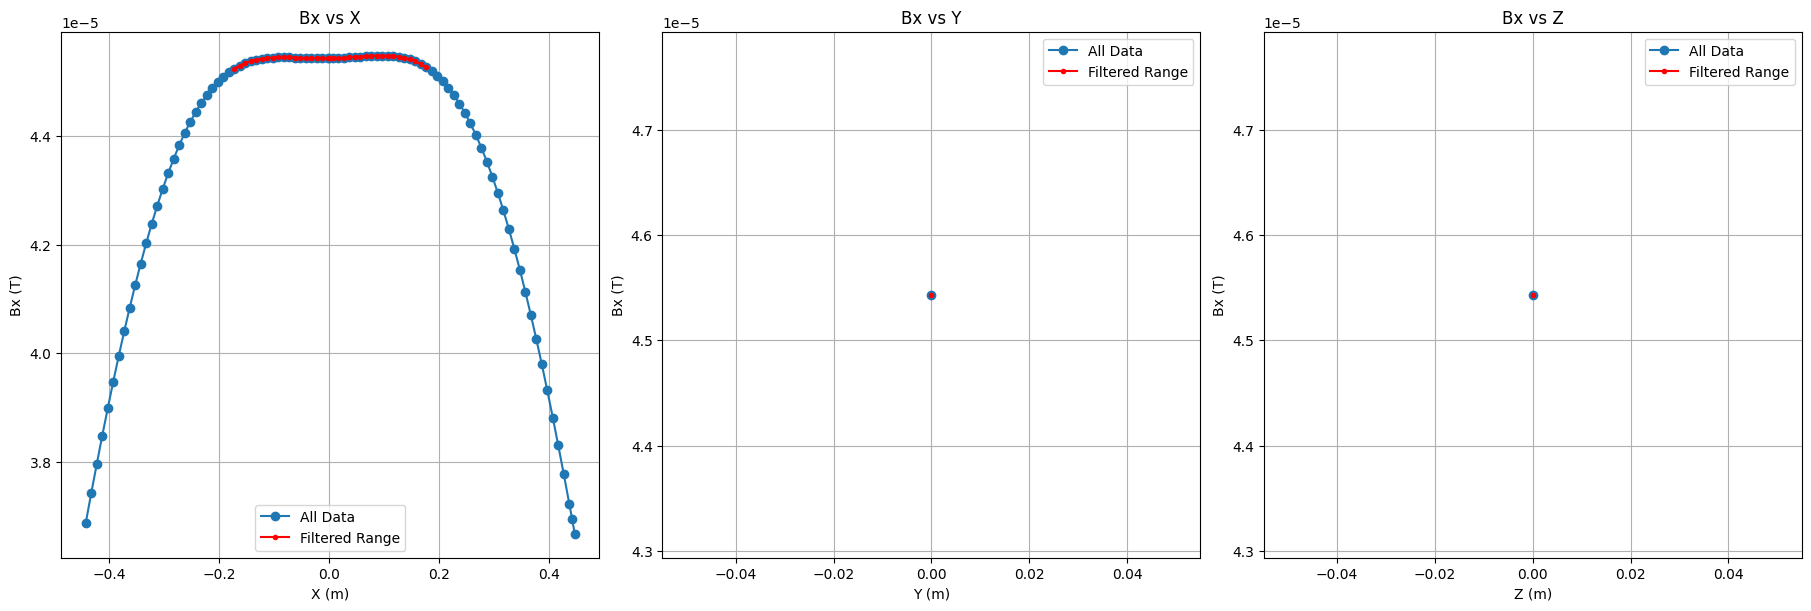

In [37]:
hplot.plot_mainAxis_field(x_coil_results_s, index='Bx')